* Steps to follow:
     * Importing required libraries
     * Loading the dataset
     * Visualization of the correlation between the variables in the data set with a heatmap
     * Feature Selection
     * Model Selection
         * KNN
         * Naive Bayes
         * SVM
         * Decision Tree
         * Random Forest
         * Logistic Regression
         * XGBoost
         * Light GBM

In [1]:
#importing required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#turn off warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
data=pd.read_csv("Cleaning_Data.csv")
df=data.copy()
df=df.drop(df.iloc[:,:1],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [3]:
#correlation table:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126606,0.211257,0.047563,-0.061192,0.027144,-0.017398,0.549695,0.220392
Glucose,0.126606,1.000000,0.220946,0.162287,0.337830,0.234041,0.118236,0.268602,0.492908
BloodPressure,0.211257,0.220946,1.000000,0.164741,-0.025568,0.286508,0.015067,0.334903,0.166131
SkinThickness,0.047563,0.162287,0.164741,1.000000,0.285411,0.562506,0.118426,0.045434,0.191333
Insulin,-0.061192,0.337830,-0.025568,0.285411,1.000000,0.207484,0.191870,-0.040448,0.147295
BMI,0.027144,0.234041,0.286508,0.562506,0.207484,1.000000,0.138545,0.035865,0.313035
DiabetesPedigreeFunction,-0.017398,0.118236,0.015067,0.118426,0.191870,0.138545,1.000000,0.047289,0.184969
Age,0.549695,0.268602,0.334903,0.045434,-0.040448,0.035865,0.047289,1.000000,0.242702
Outcome,0.220392,0.492908,0.166131,0.191333,0.147295,0.313035,0.184969,0.242702,1.000000


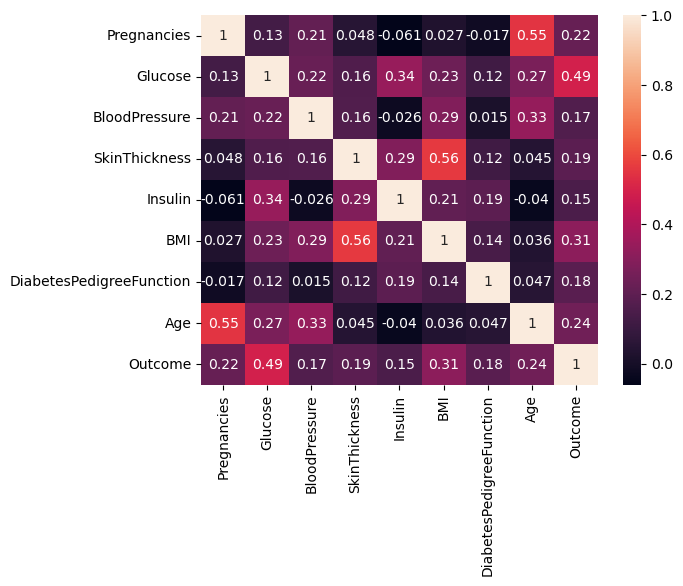

In [4]:
#visualization of the relationship between the heatmap and the variables:
sns.heatmap(df.corr(),annot=True)
plt.show();

In [5]:
import statsmodels.api as sm
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_=sm.add_constant(x)
model=sm.OLS(y,x_).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     45.98
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.43e-60
Time:                        12:17:33   Log-Likelihood:                -368.92
No. Observations:                 768   AIC:                             755.8
Df Residuals:                     759   BIC:                             797.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0482      0.106     -9.882      0.000      -1.256      -0.840
Pregnancies                  0.0201      0.005      3.936      0.000       0.010       0.030
Glucose                      0.0067      0.001     12.504      0.000       0.006       0.008
BloodPressure               -0.0016      0.001     -1.143      0.253      -0.004       0.001
SkinThickness             7.572e-05      0.002      0.036      0.971      -0.004       0.004
Insulin                     -0.0003      0.000     -1.589      0.112      -0.001    7.86e-05
BMI                          0.0153      0.003      5.647      0.000       0.010       0.021
DiabetesPedigreeFunction     0.1938      0.051      3.790      0.000       0.093       0.294
Age                          0.0020      0.002      1.276      0.202      -0.001       0.005
==============================================================================
Omnibus:                       30.860   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.442
Skew:                           0.314   Prob(JB):                     1.34e-05
Kurtosis:                       2.445   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
#Since skin thickness has no significance, I discard this variable:
x=x.drop("SkinThickness",axis=1).values
y=y.values

* **KNN Model**

In [7]:
def KNN(x,y,classification_report=False,model_return=False):
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV,KFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    knn=KNeighborsClassifier()
    params={"n_neighbors":range(1,10)}
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    grid_cv=GridSearchCV(estimator=knn,param_grid=params,scoring="f1",cv=kf)
    grid_cv.fit(x_train,y_train)
    knn_2=KNeighborsClassifier(n_neighbors=grid_cv.best_params_["n_neighbors"])
    knn_2.fit(x_train,y_train)
    tahmin=knn_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return knn_2
    else :
        return (accuracy_score,f1_score)

* **Naive Bayes Model**

In [8]:
def GaussianNB(x,y,classification_report=False,model_return=False):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    import numpy as np
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    var_smoothing = np.logspace(-9, 0, 10)
    kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    params = {'var_smoothing': var_smoothing}
    nb = GaussianNB()
    grid_search = GridSearchCV(nb, params, cv=kf)
    grid_search.fit(x_train, y_train)
    nb_2= GaussianNB(var_smoothing=grid_search.best_params_["var_smoothing"])
    nb_2.fit(x_train, y_train)
    tahmin=nb_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return nb_2
    else:
        return (accuracy_score,f1_score)

* **SVM**

In [9]:
def SVM(x,y,classification_report=False,model_return=False):
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    model = SVC()
    params={"kernel":("poly","rbf","sigmoid"),
           "C":(50,10,1.0,0.1,0.01),
           "gamma":["scale"]}
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    svc=SVC()
    grid_search=GridSearchCV(estimator=svc,param_grid=params,scoring="f1",cv=kf)
    grid_search.fit(x_train,y_train)
    svc_2=SVC(kernel=grid_search.best_params_["kernel"],C=grid_search.best_params_["C"],gamma=grid_search.best_params_["gamma"])
    svc_2.fit(x_train,y_train)
    tahmin=svc_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return svc_2
    else:
        return (accuracy_score,f1_score)

* **Decision Tree**

In [10]:
def DecisionTreeClassifier(x,y,classification_report=False,model_return=False):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    dtc=DecisionTreeClassifier()
    params = {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search=GridSearchCV(estimator=dtc,param_grid=params,cv=kf,scoring="f1")
    grid_search.fit(x_train,y_train)
    

    dtc_2=DecisionTreeClassifier(max_depth=grid_search.best_params_["max_depth"],
                                min_samples_split=grid_search.best_params_["min_samples_split"],
                                min_samples_leaf=grid_search.best_params_["min_samples_leaf"],
                                max_features=grid_search.best_params_["max_features"])
    dtc_2.fit(x_train,y_train)
    tahmin=dtc_2.predict(x_test)
    
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    
    if(model_return):
        return(dtc_2,accuracy_score,f1_score)
    else:
        return (accuracy_score,f1_score)

def DecisionTreeClassifier_Visualization(model,feature_names,class_names,record=False,file_name="tree.png",dpi=500):
    from sklearn import  tree
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30,15),dpi=200)
    tree.plot_tree(model,
              feature_names=feature_names,
              rounded=True,
              filled=True,
              class_names=class_names,
              impurity=True)
    if (record):
        plt.savefig(fname=file_name,dpi=dpi)
        plt.show()
    else:
        plt.show()

* **Random Forest**

In [11]:
def RandomForestClassifier(x,y,classification_report=False,model_return=False):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }
    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=kf,scoring="f1")
    grid_search.fit(x_train,y_train)
    
    rfc_2=RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"], max_features=grid_search.best_params_["max_features"],
                                 max_depth=grid_search.best_params_["max_depth"], criterion=grid_search.best_params_["criterion"])
    rfc_2.fit(x_train,y_train)
    tahmin=rfc_2.predict(x_test)
    
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return rfc_2
    else:
        return (accuracy_score,f1_score)

* **Logistic Regression**

In [12]:
def LogisticRegression(x,y,classification_report=False,model_return=False):  
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lr=LogisticRegression()
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'saga', 'newton-cg'],
                  'max_iter': [100, 500, 1000]}

    kf=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid_search=GridSearchCV(estimator=lr,param_grid=parameters,
                             cv=kf,n_jobs=5,verbose=True,scoring="f1")
    grid_search.fit(x_train,y_train)

    lr_2=LogisticRegression(C=grid_search.best_params_["C"],
                         penalty=grid_search.best_params_["penalty"],
                         solver=grid_search.best_params_["solver"],
                         max_iter=grid_search.best_params_["max_iter"])
    lr_2.fit(x_train,y_train)
    tahmin=lr_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if (model_return):
        return (lr_2)
    else:
        return (accuracy_score,f1_score)

* **XGBoost**

In [13]:
def XGBClassifier(x,y,classification_report=False,model_return=False):
    !pip install xgboost
    from sklearn.model_selection import train_test_split
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
    xgb_2=XGBClassifier()
    xgb_2.fit(x_train,y_train)
    tahmin=xgb_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return xgb_2
    else:
        return (accuracy_score,f1_score)

* **LightGBM**

In [14]:
def LGBMClassifier(x,y,classification_report=False,model_return=False):   
    !pip install lightgbm
    from lightgbm import LGBMClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,f1_score,classification_report
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    lgbm_2=LGBMClassifier()
    lgbm_2.fit(x_train,y_train)
    tahmin=lgbm_2.predict(x_test)
    if(classification_report):
        print(classification_report(y_test,tahmin))
    accuracy_score=accuracy_score(y_test,tahmin)
    f1_score=f1_score(y_test,tahmin)
    if(model_return):
        return lgbm_2
    else:
        return (accuracy_score,f1_score)

In [15]:
print("KNN Success: "+ str(KNN(x,y)))
print("Naive Bayes Success :" + str(GaussianNB(x,y)))
print("SVM Success : " + str(SVM(x,y)))
print("Decision Tree Success :" + str(DecisionTreeClassifier(x,y)))
print("Random Forest Success:" + str(RandomForestClassifier(x,y)))
print("Logistic Regression Success :" + str(LogisticRegression(x,y)))
print("XGBoost Success :" + str(XGBClassifier(x,y)))
print("LGBM Success : " + str(LGBMClassifier(x,y)))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154

KNN Success: (0.7012987012987013, 0.6166666666666667)
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Naive Bayes Success :(0.7467532467532467, 0.6666666666666666)
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        99
           1       0.65      0.58      0.62        55

    accuracy                           0.74       154
   macro avg

Decision Tree will be chosen as the machine learning model because it is the model with the highest success.

In [16]:
#saving the model:
model=DecisionTreeClassifier(x,y,model_return=True)
import pickle
filename = 'diabetes_predict_model.sav'
pickle.dump(model, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [18]:
# load the model from disk
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.42,random_state=42)
loaded_model = pickle.load(open("diabetes_predict_model.sav", 'rb'))
model=loaded_model[0]
result = model.score(x_train, y_train)